*Арешин Станислав Олегович М8О-404Б-17*

**Лабораторная работа №6 по курсу Численные методы**

*Москва, 2020*

# Постановка задачи

**Вариант 1**

*Уравнение:*

$$\frac{\partial^2 u}{\partial t^2}=a^2\frac{\partial^2 u}{\partial x^2}, a^2>0$$

$$u(0,t) = -sin(at)$$

$$u(\pi,t)=sin(at)$$

$$u(x,0)=sinx$$

$$u_t(x,0)=-acosx$$

*Аналитическое решение:*

$$U(x,t) = sin(x-at)$$

Используя явную схему крест и неявную схему, решить начально-краевую задачу для дифференциального уравнения гиперболического типа. Аппроксимацию второго начального условия произвести с первым и со вторым порядком. Осуществить реализацию трех вариантов аппроксимации граничных условий, содержащих производные: двухточечная аппроксимация с первым порядком, трехточечная аппроксимация со вторым порядком, двухточечная аппроксимация со вторым порядком. В различные моменты времени вычислить погрешность численного решения путем сравнения результатов с приведенным в задании аналитическим решением $U(x,t)$ .

Исследовать зависимость погрешности от сеточных параметров  $\tau, h$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Первое начальное и все граничные условия не требуют аппроксимации и записываются явно

In [2]:
a = 1

def U(x, t):
    return np.sin(x - a * t)

def u0_k(t, k):
    return -np.sin(a * t[k])

def uN_k(t, k):
    return np.sin(a * t[k])

def ui0(x, i):
    return  np.sin(x[i])

# Аппроксимация второго начального условия

## Первый порядок точности

Первый порядок точности:

$$\frac{\partial u}{\partial t}\bigg|^0_i=\frac{u^1_i-u^0_i}{\tau} + O(\tau)$$

Следовательно

$$u_i^1=-a\tau cosx_i +u_i^0$$

In [3]:
def ui1_1(x, i, tau):
    return - a * tau * np.cos(x[i]) + ui0(x, i)

## Второй порядок точности

Первый порядок точности:

$$u_i^1=u(x_i,0+\tau)=u_i^0+\tau\frac{\partial u}{\partial t}\bigg|^0_i+\frac{\tau^2}{2}\frac{\partial^2 u}{\partial t^2}\bigg|^0_i + O(\tau^2)$$

Следовательно

$$u_i^1=u_i^0 - cosx_i(\frac{a^2\tau^2}{2}+a\tau)$$

In [4]:
def ui1_2(x, i, tau):
    return ui0(x, i) - np.cos(x[i]) * (a **2 * tau ** 2 / 2 + a * tau)

# Явная схема

После подстановки аппроксимаций:

$$\frac{u_{i}^{k+1} -2u_i^k + u_{i}^{k-1}}{\tau^2}=\frac{u_{i+1}^k -2u_i^k + u_{i-1}^k}{h^2} + O(h^2+\tau^2)$$

Неизвестной сеточной функцией является $u_i^{k+1}$:

$$u_i^{k+1}=\sigma u_{i+1}^k+(2-2\sigma)u_i^k+\sigma u_{i-1}^k-u_i^{k-1}$$

Схема является условно устойчивой с условием, накладываемым на сеточные характеристики $\tau, h$:

$$\sigma=\frac{a^2\tau^2}{h^2}<1$$


## Реализация

In [5]:
def explicit_scheme(T, N, K, approx_beginnings, l=0, r=np.pi, ui0=ui0, u0_k=u0_k, uN_k=uN_k, beginnings=[ui1_1, ui1_2]):
    # инициализируем пустой список слоев
    u = [] 
    # вычисление шагов сетки по времени и по пространсву
    tau = T / K
    h = (r - l) / N
    # вычисляем сигму
    sigma = a * a * tau ** 2 / h ** 2
    # проверяем условие устойчивости схемы
    if (sigma > 1):
        raise Exception("Измените параметры сетки!")
    # рассчёт сетки
    x = [l + i * h for i in range(N + 1)]
    t = [k * tau for k in range(K + 1)]
    # 1 начальное условие
    u.append([ui0(x, i) for i in range(N + 1)])
    # 2 начальное условие
    if approx_beginnings == 1:
        u.append([beginnings[0](x, i, tau) for i in range(N + 1)])
    elif approx_beginnings == 2:
        u.append([beginnings[1](x, i, tau) for i in range(N + 1)])
        
    for k in range(1, K):
        # инициализируем следующий слой нулями
        u.append([0 for i in range(len(x))]) 
        
        # рассчёт сеточной функции 
        for i in range(1, N): 
            u[k + 1][i] = sigma * u[k][i + 1] + (2 - 2 * sigma) * u[k][i] + sigma * u[k][i - 1] - u[k - 1][i]
            
        u[k+1][0] = u0_k(t, k+1) # начальное условие 
        u[k+1][N] = uN_k(t, k+1) # краевое условие 
    
    return x, t, u

## Первый порядок аппроксимации второго начального условия

### Тест

In [6]:
x, t, u = explicit_scheme(5, 10, 100, 1)

# решение конечно-разностой схемой
print(f'Решение конечно-разностой схемой: {u[1][9]}')

# аналитическое решение
print(f'Аналитическое решение: {U(x[9], t[1])}')

# абсолютная погреншность
print(f'Абсолютная погреншность: {abs(U(x[9], t[1]) - u[1][9])}')

Решение конечно-разностой схемой: 0.3565698201897052
Аналитическое решение: 0.3561638182123456
Абсолютная погреншность: 0.00040600197735957133


### Графики решения

In [7]:
# функция отрисовки графиков решения
def plot_solution(x, t, u, scheme_type):
    
    if scheme_type == 0:
        scheme = 'явной схемой'
    elif scheme_type == 1:
        scheme = 'неявной схемой'

    x_arr = np.arange(0,np.pi,0.01)
    plt.figure(figsize=(14,7))

    # решение явной конечно-разностной схемой
    plt.plot(x,u, color = 'black',  label= f'Решение {scheme}')

    # аналитическое решение
    plt.plot(x_arr, [U(x_, t) for x_ in x_arr], color ='green',  label='Аналитическое решение')

    # точки сетки при аналитическом решениии
    plt.scatter(x, [U(x_, t) for x_ in x], color = 'red',  label='Точки пространсва (аналитическое решение)')

    # отрисовка координатной сетки
    plt.grid(color = 'blue', linestyle = '--')
    plt.xticks(np.arange(0, np.pi, 0.5))

    # легенда
    plt.xlabel('l')
    plt.ylabel('U(x,t)')
    plt.title('График решения')
    plt.legend()
    plt.show()

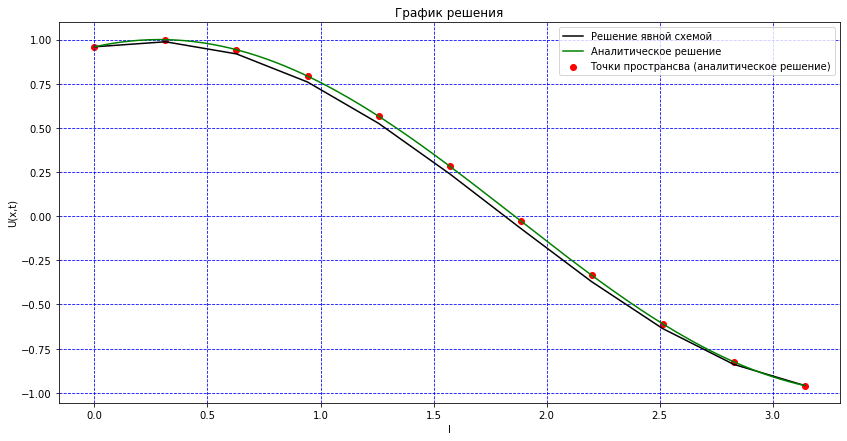

In [8]:
%matplotlib inline
plot_solution(x, t[100], u[100], scheme_type=0)

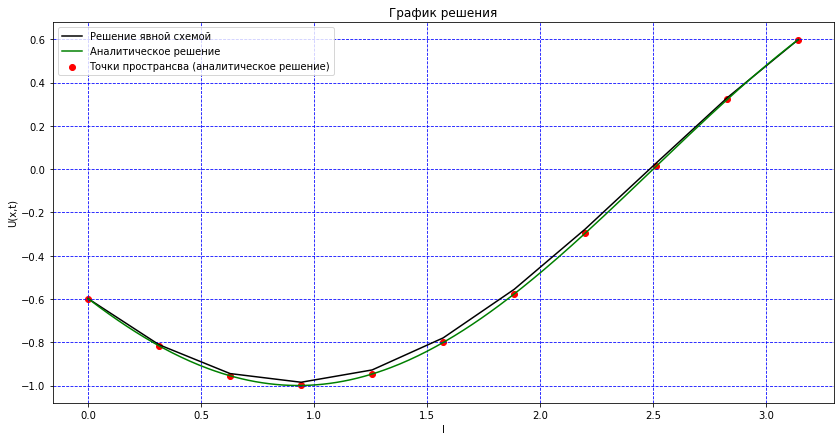

In [9]:
plot_solution(x, t[50], u[50], scheme_type=0)

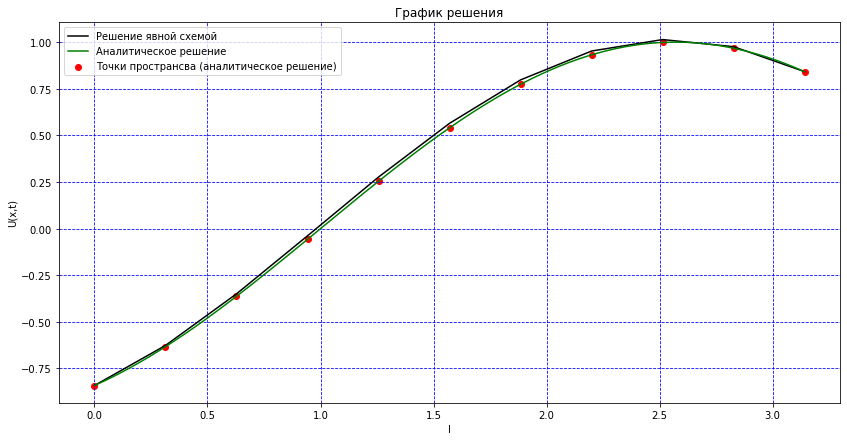

In [10]:
plot_solution(x, t[20], u[20], scheme_type=0)

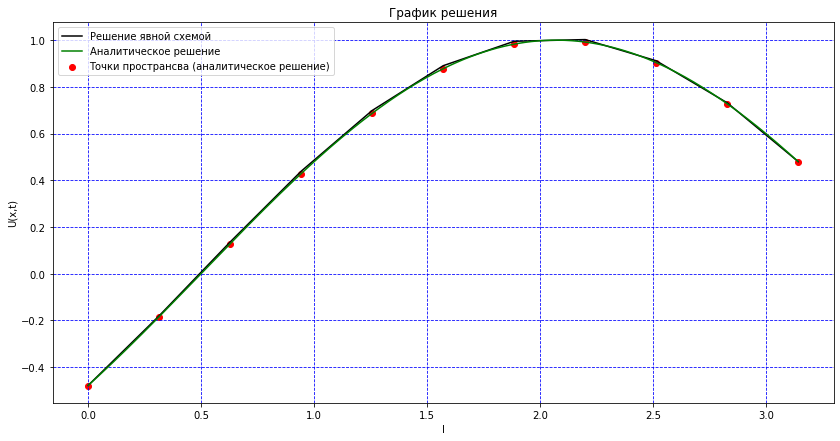

In [11]:
plot_solution(x, t[10], u[10], scheme_type=0)

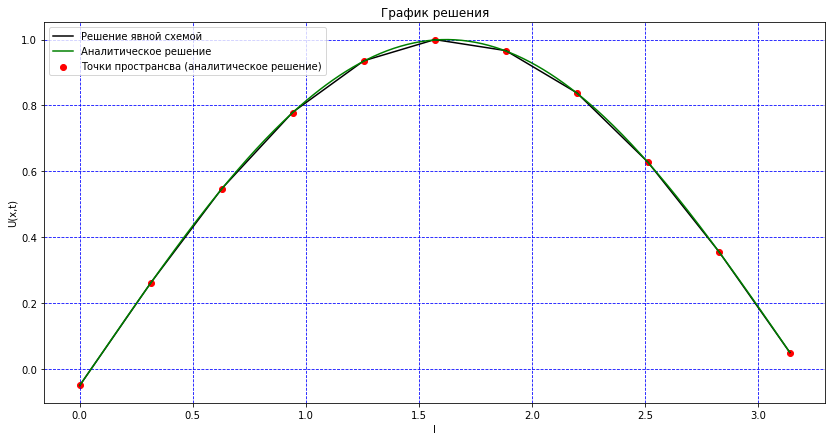

In [12]:
plot_solution(x, t[1], u[1], scheme_type=0)

### Графики погрешности

In [13]:
# аошибки по t
def errors_t(x, t, u):
    # пустой список для ошибок
    errors = []
    # считаем ошибки по t
    for i, t_ in enumerate(t):
        err = 0
        for j, x_ in enumerate(x):
            err += (U(x_, t_) - u[i][j]) ** 2
        errors.append(err ** 0.5)
    return errors

# ошибки по x
def errors_x(x, t, u):
    # пустой список для ошибок
    errors = []
    # считаем ошибки по x
    for i, x_ in enumerate(x):
        err = 0
        for j, t_ in enumerate(t):
            err += (U(x_, t_) - u[j][i]) ** 2
        errors.append(err ** 0.5)
    return errors

# функция отрисовки графиков ошибки по x
def plot_errors_x(x, t, u, scheme_type):
    
    if scheme_type == 0:
        scheme = 'явной схемы'
    elif scheme_type == 1:
        scheme = 'неявной  схемы'
    
    plt.figure(figsize=(14,7))
    
    # погрешность по x
    plt.plot(x, errors_x(x,t,u), color = 'black')

    # отрисовка координатной сетки
    plt.grid(color = 'blue', linestyle = '--')

    # легенда
    plt.xlabel('l')
    plt.ylabel('eps')
    plt.title(f'Погрешность {scheme} по x')
    plt.show()
    
# функция отрисовки графиков ошибки по t
def plot_errors_t(x, t, u, scheme_type):
    
    if scheme_type == 0:
        scheme = 'явной схемы'
    elif scheme_type == 1:
        scheme = 'неявной схемы'
    
    plt.figure(figsize=(14,7))
    
   # погрешность по t
    plt.plot(t, errors_t(x,t,u), color = 'black')

    # отрисовка координатной сетки
    plt.grid(color = 'blue', linestyle = '--')

    # легенда
    plt.xlabel('t')
    plt.ylabel('eps')
    plt.title(f'Погрешность {scheme} по t')
    plt.show()

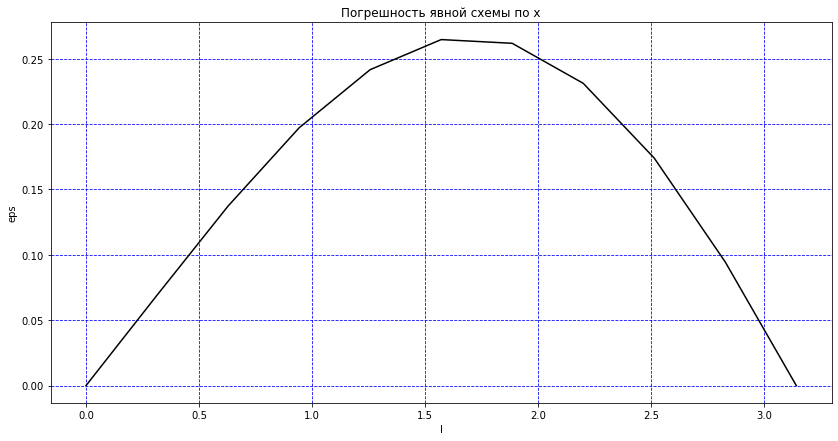

In [14]:
plot_errors_x(x, t, u, 0)

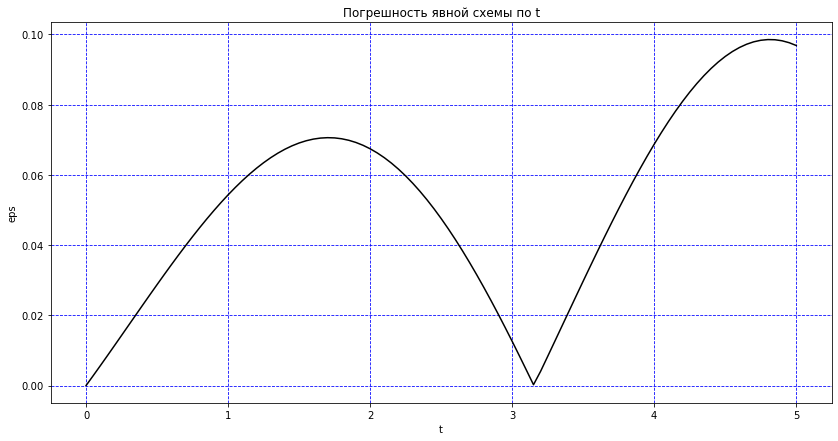

In [15]:
plot_errors_t(x, t, u, 0)

## Второй порядок аппроксимации второго начального условия

### Тест

In [16]:
x, t, u = explicit_scheme(5, 10, 100, 2)

# решение конечно-разностой схемой
print(f'Решение конечно-разностой схемой: {u[1][9]}')

# аналитическое решение
print(f'Аналитическое решение: {U(x[9], t[1])}')

# абсолютная погреншность
print(f'Абсолютная погреншность: {abs(U(x[9], t[1]) - u[1][9])}')

Решение конечно-разностой схемой: 0.35775864083507414
Аналитическое решение: 0.3561638182123456
Абсолютная погреншность: 0.0015948226227285311


### Графики решения

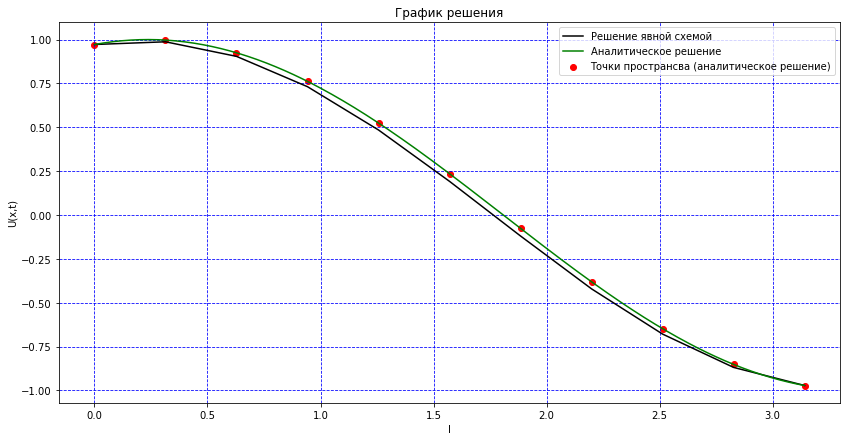

In [17]:
plot_solution(x, t[99], u[99], scheme_type=0)

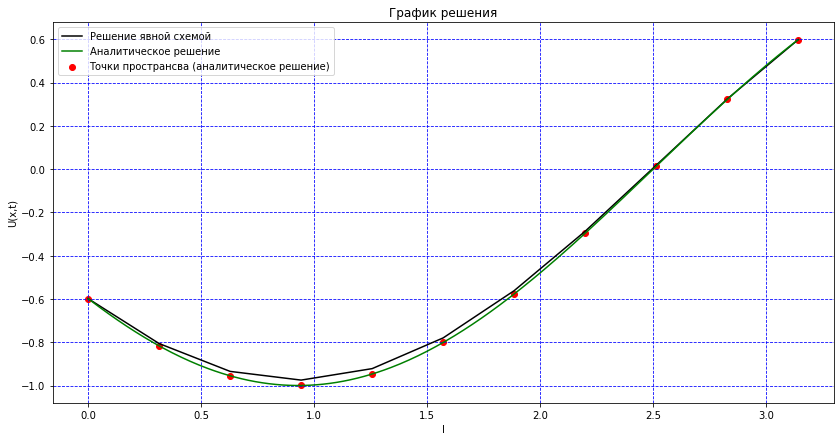

In [18]:
plot_solution(x, t[50], u[50], scheme_type=0)

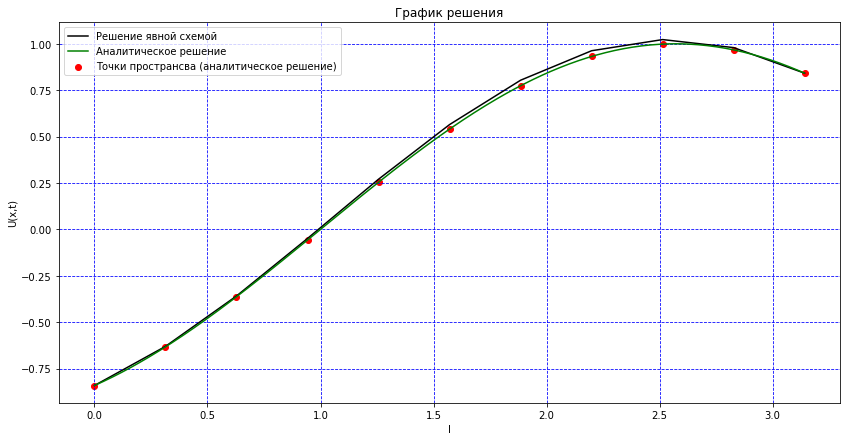

In [19]:
plot_solution(x, t[20], u[20], scheme_type=0)

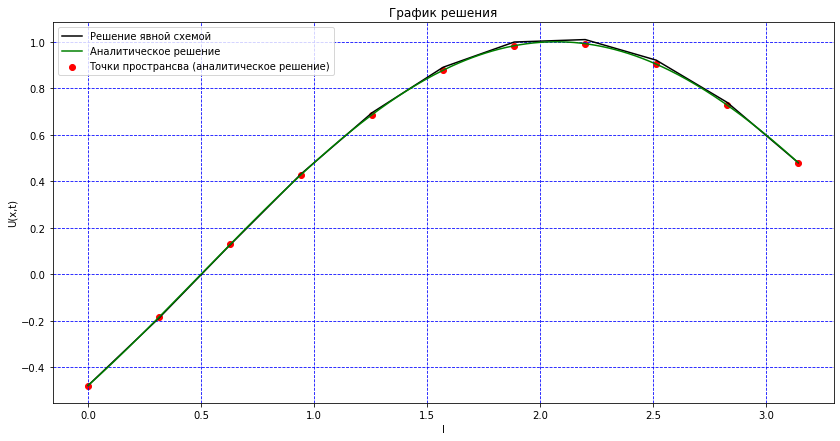

In [20]:
plot_solution(x, t[10], u[10], scheme_type=0)

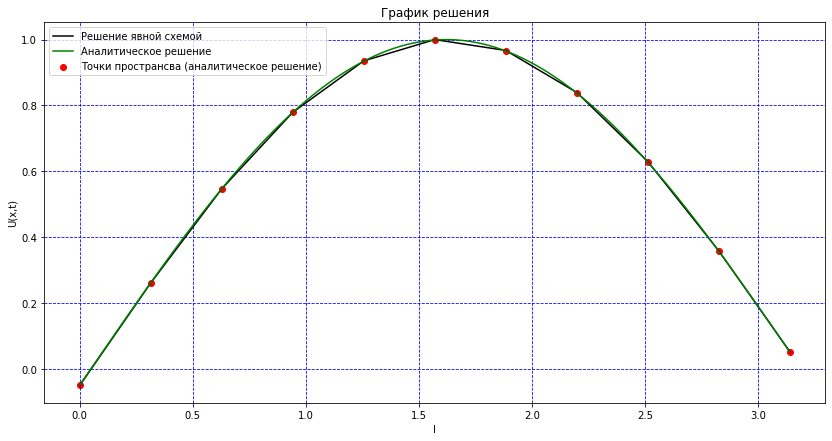

In [21]:
plot_solution(x, t[1], u[1], scheme_type=0)

### Графики погрешности

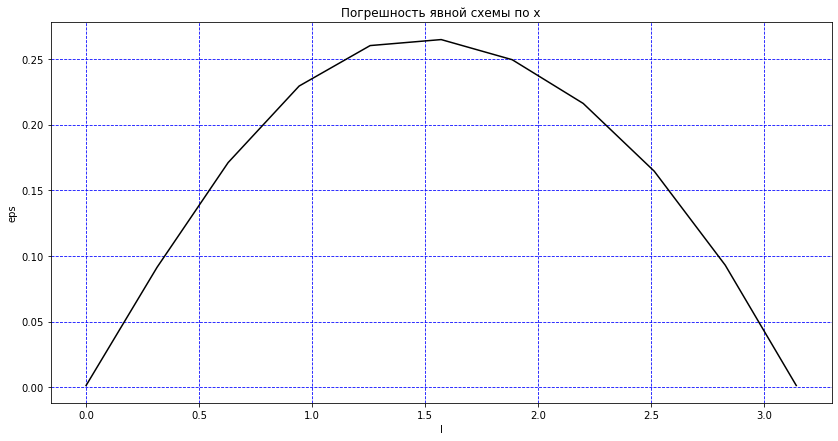

In [22]:
plot_errors_x(x, t, u, 0)

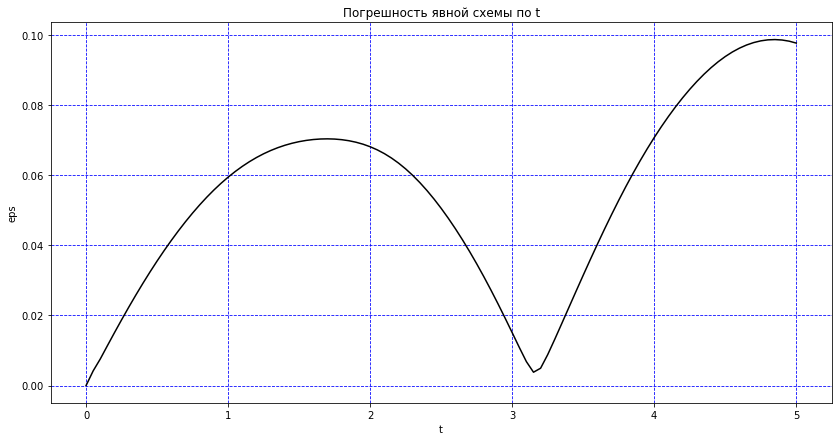

In [23]:
plot_errors_t(x, t, u, 0)

# Неявная схема

$\frac{u_i^{k+1} - 2u_i^k + u_i^{k-1}}{\tau^2} = a^2\frac{u_{i+1}^{k+1} -2u_i^{k+1} + u_{i-1}^{k+1}}{h^2} + O(\tau^2 + h^2)$



## Реализация

In [24]:
# метод прогонки
def tridig_matrix_alg(A, b):
    
    X = [0 for i in range(len(A[0]))]
    P = [0 for i in range(len(A[0]))]
    Q = [0 for i in range(len(A[0]))]
    P[0] = -A[0][1] / A[0][0]
    Q[0] = b[0] / A[0][0]
    
    for i in range(1, len(b)):
        if i != len(A[0]) - 1:
            P[i] = -A[i][i + 1] / (A[i][i] + P[i - 1] * A[i][i - 1])
        else:
            P[i] = 0
        Q[i] = (b[i] - Q[i - 1] * A[i][i - 1]) / (A[i][i] + P[i - 1] * A[i][i - 1])
    for i in range(len(b) - 1, -1, -1):
        if i != len(A[0]) - 1:
            X[i] = X[i + 1] * P[i] + Q[i]
        else:
            X[i] = Q[i]
    return X

In [25]:
def implicit_scheme(T, N, K, approx_beginnings, l=0, r=np.pi, ui0=ui0,u0_k=u0_k, uN_k=uN_k, beginnings=[ui1_1, ui1_2]):
    
    # инициализируем пустой список слоев
    u = []
    # вычисление шагов сетки по времени и по пространсву
    tau = T / K
    h = (r - l) / N
    # вычисляем сигму
    sigma = a * a * tau ** 2 / h ** 2
    # рассчёт сетки
    x = [l + i * h for i in range(N + 1)]
    t = [k * tau for k in range(K + 1)]
    # вычилсяем начальные параметры из 1 начального условия
    u.append([ui0(x, i) for i in range(N + 1)])
     # вычилсяем начальные параметры из 2 начального условия
    if approx_beginnings == 1:
        u.append([beginnings[0](x, i, tau) for i in range(N + 1)])
    elif approx_beginnings == 2:
        u.append([beginnings[1](x, i, tau) for i in range(N + 1)])
    
    for k in range(1, K):
        # инициализируем пустые списки для СЛАУ, которое будем решать методом прогонки
        A = []
        b = []
        
        ai = sigma
        bi = - (1 + 2 * sigma)
        ci = sigma        
        
        for i in range(N + 1):
            
            Ai_str =[]
            
            di = u[k - 1][i] - 2 * u[k][i]
            b0= 1
            c0= 0
            d0 = u0_k(t, k + 1)
            aN=0
            bN=1
            dN =  uN_k(t, k + 1)
            if i == 0:                 
                b.append(d0)
                Ai_str = [0] * (N + 1)
                Ai_str[0] = b0
                Ai_str[1] = c0
                A.append(Ai_str)
                continue
            elif i == N:
                b.append(dN)
                Ai_str = [0] * (N + 1)
                Ai_str[N - 1] = aN
                Ai_str[N] = bN
                A.append(Ai_str)
                continue
            else:
                b.append(di)               
            
            for j in range(N + 1):
                if (j == i - 1):
                    Ai_str.append(ai)
                elif (j == i + 1):
                    Ai_str.append(ci)
                elif j == i:
                    Ai_str.append(bi)
                else:
                    Ai_str.append(0)   
                    
            A.append(Ai_str)
        u.append(tridig_matrix_alg(A, b))
    
    return x, t, u

## Первый порядок аппроксимации второго начального условия

### Тест

In [26]:
x, t, u = implicit_scheme(5, 10, 100, 1)

# решение конечно-разностой схемой
print(f'Решение конечно-разностой схемой: {u[1][9]}')

# аналитическое решение
print(f'Аналитическое решение: {U(x[9], t[1])}')

# абсолютная погреншность
print(f'Абсолютная погреншность: {abs(U(x[9], t[1]) - u[1][9])}')

Решение конечно-разностой схемой: 0.3565698201897052
Аналитическое решение: 0.3561638182123456
Абсолютная погреншность: 0.00040600197735957133


### Графики решения

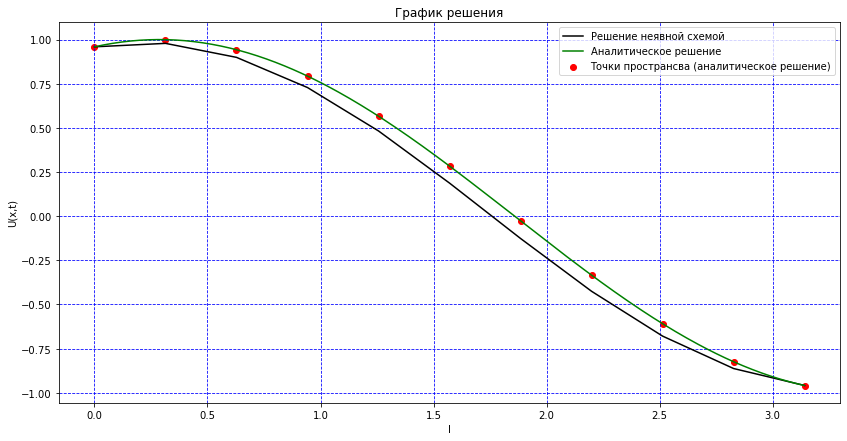

In [27]:
plot_solution(x, t[100], u[100], scheme_type=1)

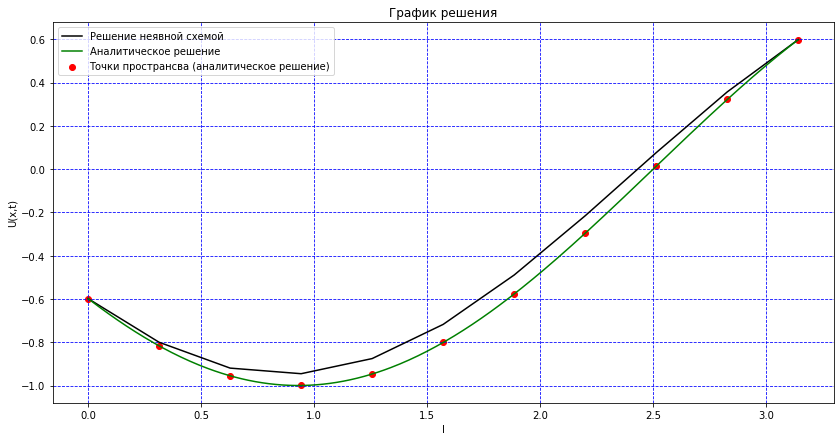

In [28]:
plot_solution(x, t[50], u[50], scheme_type=1)

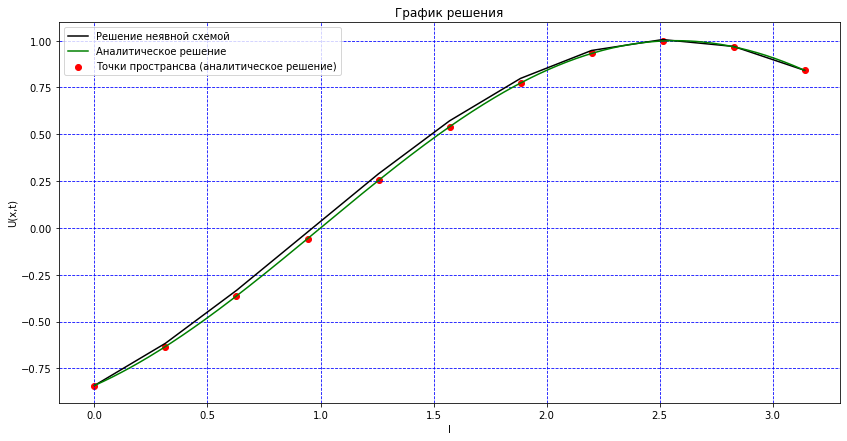

In [29]:
plot_solution(x, t[20], u[20], scheme_type=1)

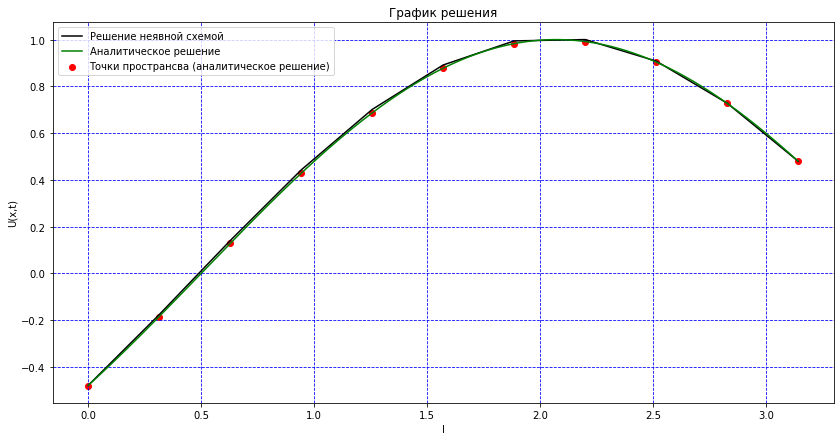

In [30]:
plot_solution(x, t[10], u[10], scheme_type=1)

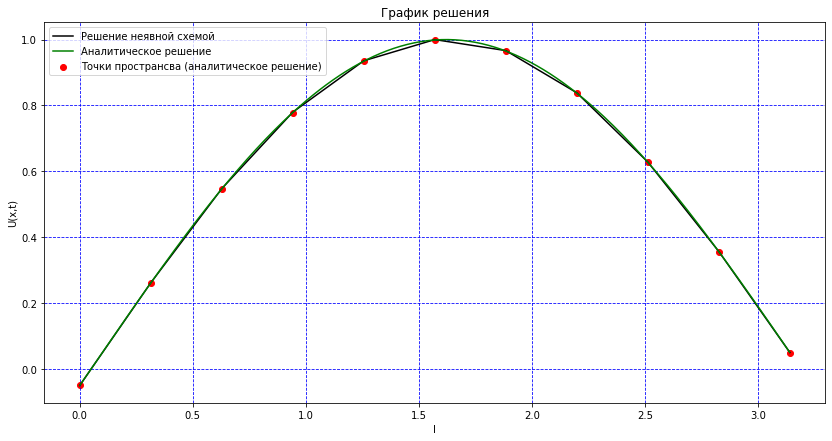

In [31]:
plot_solution(x, t[1], u[1], scheme_type=1)

### Графики погрешности

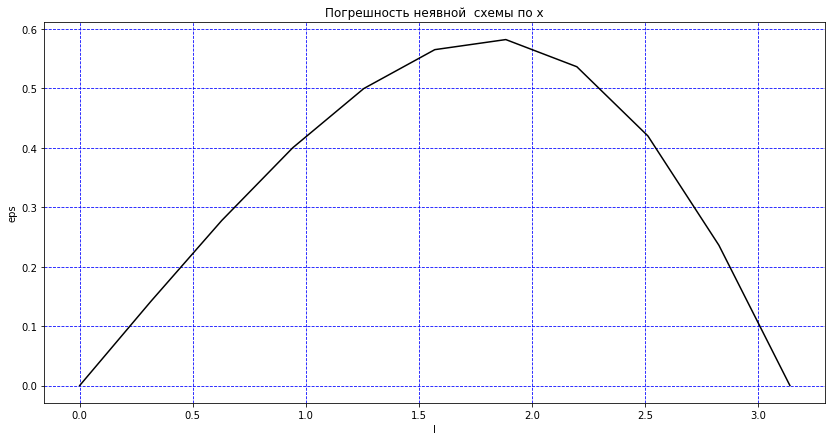

In [32]:
plot_errors_x(x, t, u, 1)

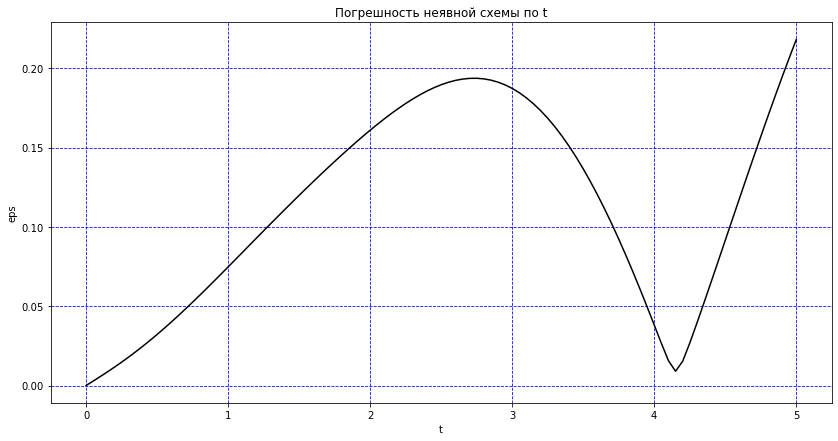

In [33]:
plot_errors_t(x, t, u, 1)

## Второй порядок аппроксимации второго начального условия

### Тест

In [34]:
x, t, u = implicit_scheme(5, 10, 100, 2)

# решение конечно-разностой схемой
print(f'Решение конечно-разностой схемой: {u[1][9]}')

# аналитическое решение
print(f'Аналитическое решение: {U(x[9], t[1])}')

# абсолютная погреншность
print(f'Абсолютная погреншность: {abs(U(x[9], t[1]) - u[1][9])}')

Решение конечно-разностой схемой: 0.35775864083507414
Аналитическое решение: 0.3561638182123456
Абсолютная погреншность: 0.0015948226227285311


### Графики решения

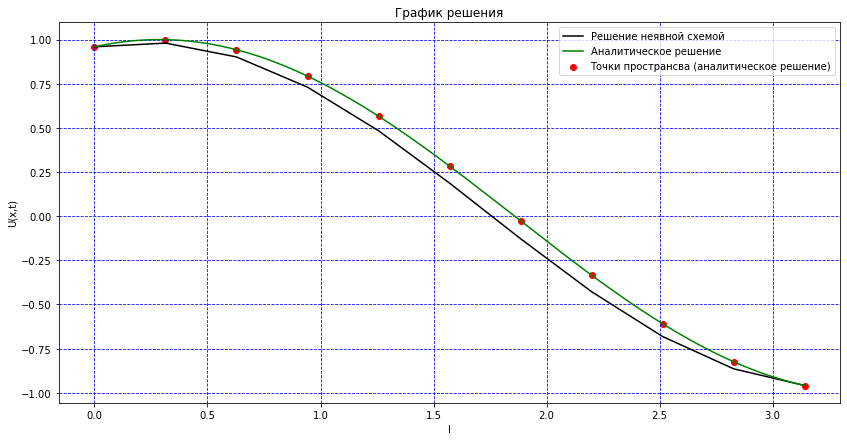

In [35]:
plot_solution(x, t[100], u[100], scheme_type=1)

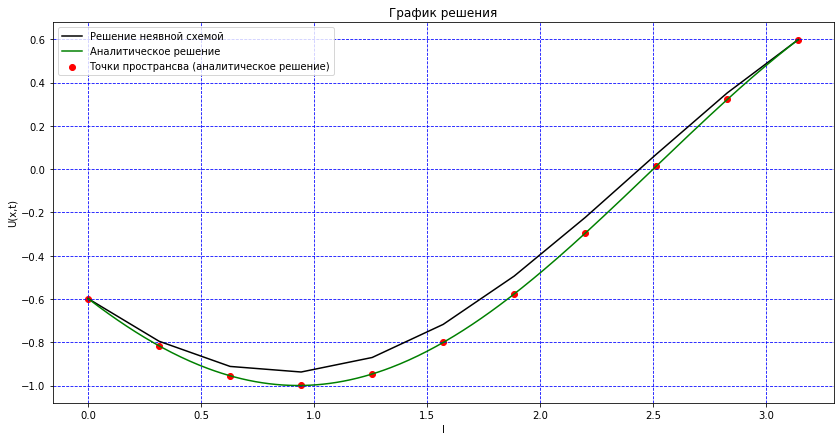

In [36]:
plot_solution(x, t[50], u[50], scheme_type=1)

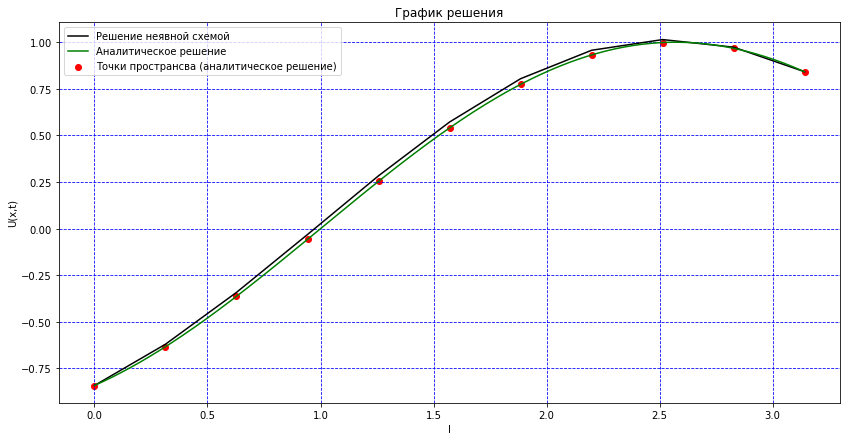

In [37]:
plot_solution(x, t[20], u[20], scheme_type=1)

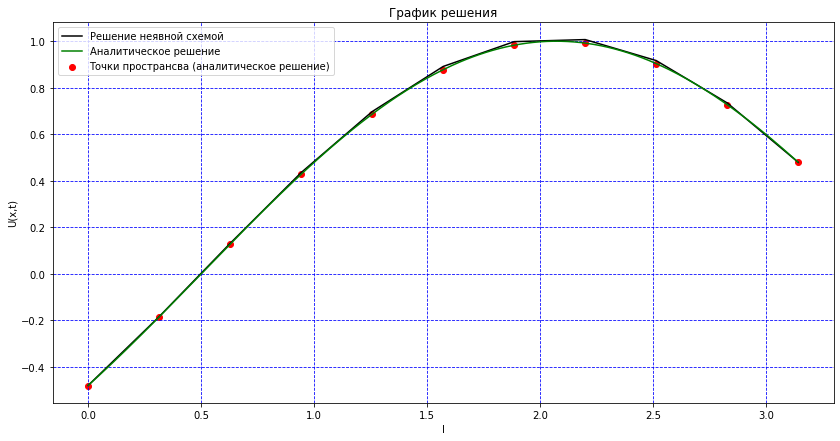

In [38]:
plot_solution(x, t[10], u[10], scheme_type=1)

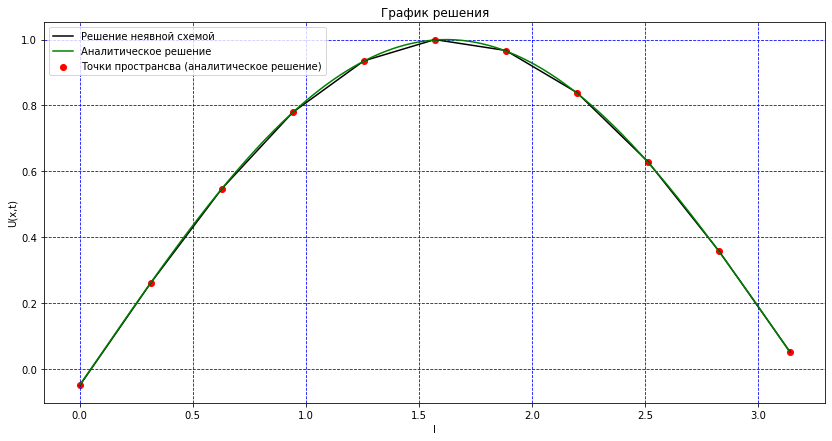

In [39]:
plot_solution(x, t[1], u[1], scheme_type=1)

### Графики погрешности

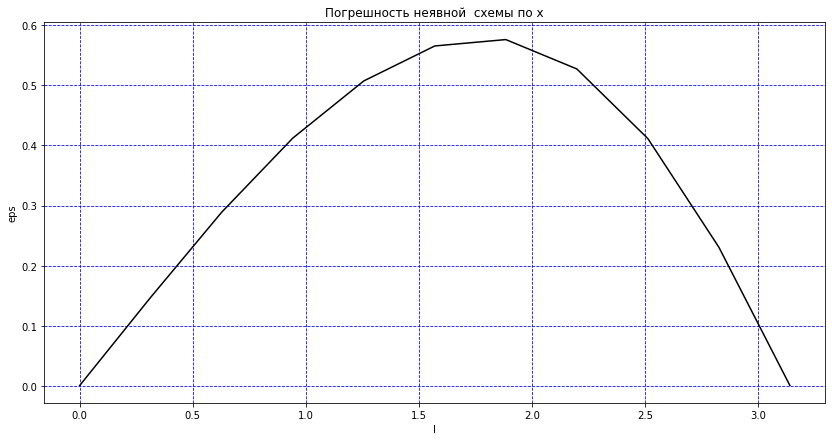

In [40]:
plot_errors_x(x, t, u, 1)

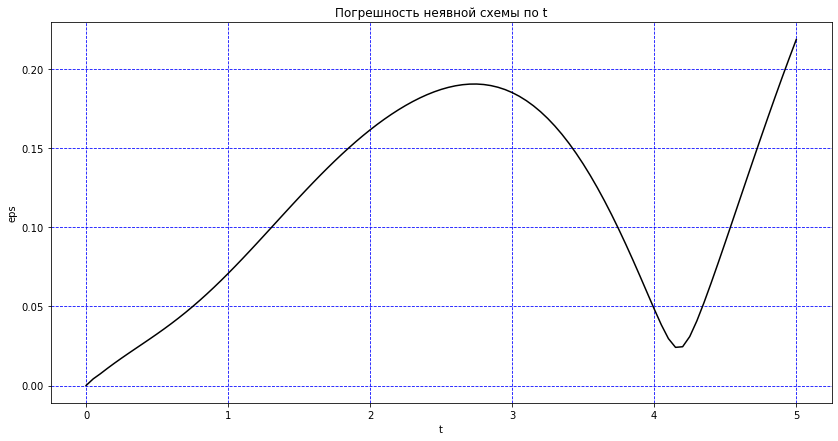

In [41]:
plot_errors_t(x, t, u, 1)

# Вывод

В результате выполнения лабораторной работы были освоены две схемы для решения начально-краевой задачи для дифференциального уравнения гиперболического типа. Так же были изучены типы аппроксимации начальных и краевых условий. 

Так как краевые условия неочень сложные, результаты при аппроксимации второго начального условия первым и вторым порядком точности практически не отличаются для обеих схем. Однако, в целом явная схема даёт лучший результат для моего варинта, она имеет меньшую погрешность решения при тех же параметрах сетки чем неявная схема. Но при решении задач такого типа стоит помнить, что явная схема условно устойчива, а неявная абсолютно устойчива.